In [1]:
import pandas as pd
from urlparse import urlparse
import tldextract
from collections import Counter
import jieba
import json
import math
import numpy as np
from time import time

In [2]:
class Toolbox (object):
    def __init__(self):
        self.init = 1
        
    def sort_dict (self, d, max=50):
        t = sorted(d.items(), key=lambda x: (-x[1], x[0]))
        return t[:max]
    
    def add_dict (self, x, y):
        d = { k: x.get(k, 0) + y.get(k, 0) for k in set(x) | set(y) }
        return d
    
    def create_dict(self, k1, v1, filters = True):
        if filters == True:
            k1_list0 = k1.strip('()').split(',')
            v1_list0 = v1.strip('()').split(',')
            #print v1_list0
            #print k1_list0
            k1_list1 = filter(None, k1_list0)        
            v1_list1 = filter(None, v1_list0)
        else:
            k1_list1 = k1
            v1_list1 = v1
        
        #print ' '.join(k1_list1)
        k2_list1 = [item.decode('utf-8') for item in k1_list1]
        v2_list1 = [float(item) for item in v1_list1]

    def create_vec(self, k1, v1):
        return (zip(k1, v1))
    
    def get_dict_top_n(self, d, max=50):
        ret = self.sort_dict(d, max)
        words, fq = zip(*ret)
        sum_up = sum(fq)
        fq_normalized = tuple(item/sum_up for item in fq)
        
        return dict(zip(words, fq_normalized))
    
    #calculate cosine between two dictionaries
    def get_sim(self, vec1, vec2):
        
        #get intersection
        intersection = set(vec1.keys()) & set(vec2.keys())
        
        #print intersection
        numerator = sum([vec1[x] * vec2[x] for x in intersection])

        #print 'num ---', numerator
        #print vec1.keys()
        #print vec1.values()
        #print vec2.keys()
        #print vec2.values()        
        
        if numerator == 0:
            return 0.0
        
        sum1 = sum([vec1[x]**2 for x in vec1.keys()])
        sum2 = sum([vec2[x]**2 for x in vec2.keys()])
        denominator = math.sqrt(sum1) * math.sqrt(sum2)

        if not denominator:
            return 0.0
        else:
            return float(numerator) / denominator
        
    def sum_vects(self, vects):
        sum_vects = None
        for vec in vects:
            if sum_vects == None:
                sum_vects = vec
            else:
                sum_vects = self.add_dict(sum_vects, vec)
        #only return first 100 after additions
        #print type(sum_vecs)
        return self.get_dict_top_n(sum_vects)
    
    def unserialized(self, x, eval_val=True):
        #print '----- in'
        #print x
        d = dict()
        s = x.strip('{}')
        #s = s.strip('[]')
        ret = s.split(',')

        #print ret
        for t in ret:
            r = t.split(':')
            #print r[0], r[1]
            key = eval(r[0].decode('utf-8'))
            if eval_val == True:
                d[key] = int(r[1])
            else:
                d[key] = r[1]
        #print len(ret)
        #print 'split -----'
        #print ' '.join(ret)
        return d
        
    def get_centroid_df(self, check, t_sim, num=2000):        
        if len(check) > num:
            #sampling     
            ratio = num*1.0/len(check)
            print 'ratio ---', ratio 
            msk = np.random.rand(len(check)) < ratio
            tmp = check[msk]
            check = tmp
    
        check.info()
        check_vecs = check['s_vec']
        return self.sum_vects(check_vecs) 
    
    def set_contained_flag(self, x, y):
        x_keys = x.keys()
        y_keys = y.keys()
        for s in y_keys:
            if s in x_keys:
                return True
        return False

In [3]:
aT = Toolbox()

In [4]:
df = pd.read_csv('/Users/nhu2000/projects/SimilarSearch/data/query/dsi_query_sim_v1.csv')

In [5]:
#split pandas dataframe
msk = np.random.rand(len(df)) < 0.05
df_part = df[msk]

In [6]:
df_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 14 to 86228
Data columns (total 18 columns):
url                4300 non-null object
domain             4300 non-null object
body               4300 non-null object
title              4300 non-null object
key_words          4300 non-null object
sim                4300 non-null float64
dl_sim             4300 non-null float64
analytics_sim      4300 non-null float64
dm_sim             4300 non-null float64
ml_sim             4300 non-null float64
dsj_sim            4300 non-null float64
dsn_sim            4300 non-null float64
ba_sim             4300 non-null float64
ds_sim             4300 non-null float64
summary            4300 non-null object
signature          4300 non-null object
check_distances    4300 non-null float64
bd_sim             4300 non-null float64
dtypes: float64(11), object(7)
memory usage: 638.3+ KB


In [7]:
import re
def map_s_vec(x):
    s = x.split()
    words = [re.sub('[^a-zA-Z]+', '', item).lower().strip() for item in s if len(re.sub('[^a-zA-Z]+', '', item)) > 1]
    count = Counter(words)
    top_100 = count.most_common()
    return dict(top_100)

In [21]:
map_s_vec(df_part.iloc[1]['body'])

{'accelerators': 1,
 'address': 5,
 'addresses': 1,
 'ads': 1,
 'adviser': 1,
 'aerospace': 1,
 'africa': 1,
 'again': 2,
 'all': 1,
 'america': 1,
 'amrica': 1,
 'an': 2,
 'and': 1,
 'arts': 5,
 'asia': 2,
 'autos': 1,
 'bankruptcy': 1,
 'barrons': 2,
 'beat': 2,
 'been': 2,
 'below': 1,
 'best': 1,
 'bigcharts': 1,
 'billion': 1,
 'blogs': 10,
 'bonds': 1,
 'book': 1,
 'books': 1,
 'brasil': 1,
 'brussels': 1,
 'business': 3,
 'canada': 1,
 'cancel': 1,
 'cant': 1,
 'capital': 1,
 'care': 1,
 'careers': 1,
 'cars': 1,
 'cfo': 2,
 'china': 3,
 'christopher': 1,
 'cio': 2,
 'class': 2,
 'classacfooter': 1,
 'classacheadline': 1,
 'classdropdowncontainerclass': 1,
 'classfooter': 1,
 'classhdrsearchlistcomp': 1,
 'classhdrsearchlistname': 2,
 'classhdrsearchlistsearch': 1,
 'classifieds': 1,
 'classlineitem': 2,
 'classroom': 1,
 'classsearchlistcompmarkets': 1,
 'classsearchlistcompname': 1,
 'classsearchlistcompticker': 1,
 'classsearchresult': 2,
 'classsearchtermgoldspan': 2,
 'clas

In [8]:
#unseralized
t0 = time()
df_part['s_vec'] = df_part.body.map(lambda x: map_s_vec(x)) 
print (time() - t0)

10.4960231781


/Library/Python/2.7/site-packages/ipykernel-4.5.2-py2.7.egg/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [49]:
df_part.head()

,url,domain,body,title,key_words,sim,dl_sim,analytics_sim,dm_sim,ml_sim,dsj_sim,dsn_sim,ba_sim,ds_sim,summary,signature,check_distances,bd_sim,s_vec,cluster
2,http://www.economist.com/films,economist.com,Films | The Economist Our cookie policy has ch...,Films | The Economist,"{u'tomorrows': 0.00847457627119, u'global': 0....",0.009322,0.0,0.000000,0.000000,0.0,0.030006,0.000000,0.000000,0.000000,Films | The Economist Our cookie policy has ch...,"{u'tomorrows': 0.00847457627119, u'global': 0....",0.330666,0.000000,"{u'tomorrows': 2, u'global': 5, u'resistance':...",3
48,http://www.wsj.com/public/page/news-law-legal....,wsj.com,Law News - Court News - Wall Street Journal - ...,Law News - Court News - Wall Street Journal - ...,"{u'classsuggestionblock': 0.00888888888889, u'...",0.027603,0.0,0.000000,0.000000,0.0,0.000000,0.071877,0.000000,0.000000,Law News - Court News - Wall Street Journal - ...,"{u'classsuggestionblock': 0.00888888888889, u'...",0.048623,0.000000,"{u'all': 1, u'classsuggestionblock': 2, u'comm...",3
84,http://www.masterschool.eitictlabs.eu/educatio...,eitictlabs.eu,Programme Contents FAQ - EIT ICT Labs Applicat...,Programme Contents FAQ - EIT ICT Labs,"{u'summer': 0.0255102040816, u'selection': 0.0...",0.052010,0.0,0.000000,0.000000,0.0,0.058058,0.058058,0.000000,0.071107,Programme Contents FAQ - EIT ICT Labs Applicat...,"{u'summer': 0.0255102040816, u'selection': 0.0...",0.088686,0.000000,"{u'summer': 5, u'selection': 3, u'global': 1, ...",4
121,http://www.qlik.com/us/explore/solutions/indus...,qlik.com,"Banking BI Solution, Banking Business Intellig...","Banking BI Solution, Banking Business Intellig...","{u'operations': 0.00961538461538, u'sector': 0...",0.248806,0.0,0.072667,0.102767,0.0,0.083909,0.083909,0.179842,0.102767,"Banking BI Solution, Banking Business Intellig...","{u'operations': 0.00961538461538, u'sector': 0...",0.068664,0.179842,"{u'all': 5, u'managed': 1, u'chain': 1, u'glob...",3
129,http://www.qlik.com/us/explore/solutions/indus...,qlik.com,Business Intelligence Solutions for Public Sec...,Business Intelligence Solutions for Public Sec...,"{u'sector': 0.0241935483871, u'month': 0.00806...",0.273497,0.0,0.000000,0.209460,0.0,0.171023,0.171023,0.209460,0.209460,Business Intelligence Solutions for Public Sec...,"{u'sector': 0.0241935483871, u'month': 0.00806...",0.034449,0.209460,"{u'all': 4, u'chain': 1, u'riccardo': 1, u'con...",3


In [264]:
#create similarity matrix

In [9]:
sim_mat = np.zeros(shape=(len(df),len(df)))

In [10]:
t0 = time()
for i in range (0, len(df_part)):
    for j in range (i, len(df_part)):
        v1 = df_part.iloc[i]['s_vec']
        v2 = df_part.iloc[j]['s_vec']
        sim_mat[i][j] = 1.0 - aT.get_sim(v1, v2)
        sim_mat[j][i] = sim_mat[i][j]
print (time() - t0)

3081.55106306


In [321]:
sim_mat[1][2001], sim_mat[2001][1]

(0.28809220426060411, 0.28809220426060411)

dist = 1.0 - sim_mat

In [265]:
orig_df = pd.read_csv('/Users/nhu2000/projects/SimilarSearch/data/final/huizhou-final-v2.csv')

In [323]:
dict

(2190, 665)

In [11]:
def get_content_seg_by_url(url):
    df = orig_df[orig_df['url'] == url]
    return df.iloc[0]['content_seg']

In [12]:
articles = df_part['body']

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = 'word', max_df=0.8, min_df=0.08, use_idf=True, stop_words = 'english', max_features=200000,)
document_term_mat = vectorizer.fit_transform(articles)
terms = vectorizer.get_feature_names()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = 'word', max_df=0.8, min_df=0.08, use_idf=False, stop_words = 'english', max_features=200000,)
document_term_mat = vectorizer.fit_transform(articles)
terms = vectorizer.get_feature_names()

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
sim_max = cosine_similarity(document_term_mat)

In [44]:
dist = 1 - sim_max

In [29]:
sim_max[1][2001], sim_max[2001][1]

(0.075803005918599869, 0.075803005918599869)

In [342]:
sim_max[2][2]

1.0

In [250]:
print (document_term_mat.shape)

In [14]:
vocab_frame = pd.DataFrame({'words': terms})

In [15]:
from sklearn.cluster import KMeans
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
%time km.fit(document_term_mat)
clusters = km.labels_.tolist()

CPU times: user 41 s, sys: 124 ms, total: 41.1 s
Wall time: 41.2 s


In [16]:
df_part['cluster'] = clusters

/Library/Python/2.7/site-packages/ipykernel-4.5.2-py2.7.egg/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
df_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4309 entries, 2 to 86191
Data columns (total 20 columns):
url                4309 non-null object
domain             4309 non-null object
body               4309 non-null object
title              4309 non-null object
key_words          4309 non-null object
sim                4309 non-null float64
dl_sim             4309 non-null float64
analytics_sim      4309 non-null float64
dm_sim             4309 non-null float64
ml_sim             4309 non-null float64
dsj_sim            4309 non-null float64
dsn_sim            4309 non-null float64
ba_sim             4309 non-null float64
ds_sim             4309 non-null float64
summary            4309 non-null object
signature          4309 non-null object
check_distances    4309 non-null float64
bd_sim             4309 non-null float64
s_vec              4309 non-null object
cluster            4309 non-null int64
dtypes: float64(11), int64(1), object(8)
memory usage: 706.9+ KB


In [17]:
df_part['cluster'].value_counts()

3    2181
1     703
0     643
2     373
5     243
4     157
Name: cluster, dtype: int64

df.to_csv('/Users/nhu2000/projects/SimilarSearch/data/clean/huizhou-web-full_v1_4.csv', encoding='utf-8', index=False)

In [18]:
from __future__ import print_function
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i)
    
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print (terms[ind])       
        #print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'))
    print() #add whitespace
    print() #add whitespace
    

Cluster 0 words:
data
analytics
big
ibm
business
management
cloud
blog
hadoop
predictive
social
best
world
events
2015
use
media
intelligence
services
customer


Cluster 1 words:
data
science
analytics
big
learning
machine
mining
central
sign
2015
news
scientist
tags
stories
2016
comments
hadoop
need
deep
rss


Cluster 2 words:
university
students
student
research
school
programs
program
science
information
engineering
academic
career
center
course
computer
department
education
courses
business
degree


Cluster 3 words:
data
news
com
business
information
services
2015
new
contact
security
2016
support
software
search
home
mobile
web
site
management
use


Cluster 4 words:
account
tweets
twitter
english
tweet
close
search
uk
users
videos
language
following
view
link
log
location
http
like
com
sign


Cluster 5 words:
2015
2013
2014
2012
2011
january
data
july
december
august
september
october
november
2016
june
april
february
march
14
29




In [19]:
#Multidimensional scaling
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib 

from sklearn.manifold import MDS

In [ ]:
MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(sim_mat)  # shape (n_components, n_samples)
#pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs_full, ys_full = pos[:, 0], pos[:, 1]
print()
print()

In [46]:
#set up colors per clusters using a dict
cluster_colors = {0: '#8f9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e78181', 4: '#66a61e',
                  5: '#fb0877', 6: '#065f06', 7: '#f570b3', 8: '#08848a', 9: '#a4a4a4',
                 }

#set up cluster names using a dict
cluster_names = {0: 'Analytics', 
                 1: 'Data Science', 
                 2: 'Developers', 
                 3: 'News', 
                 4: 'Research',  
                 5: 'Social Media' 
                 }

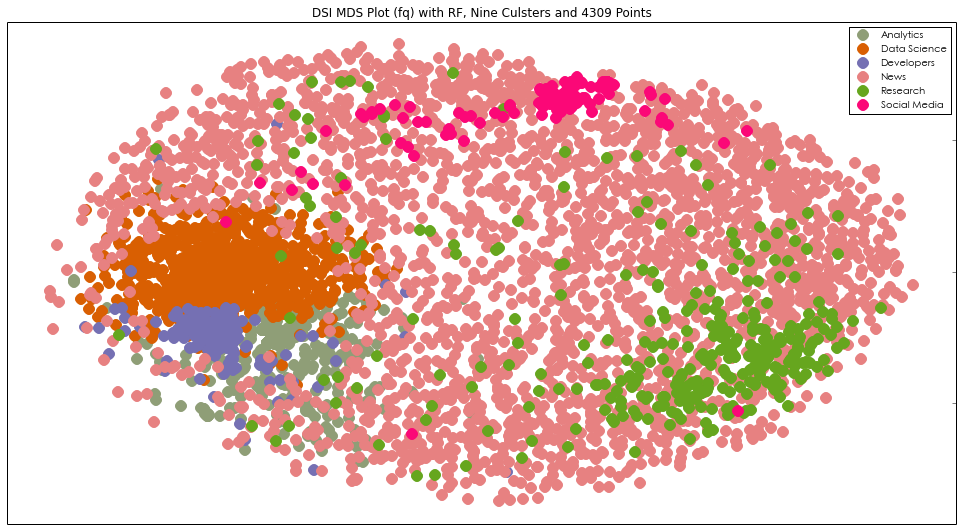

In [48]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

from matplotlib.font_manager import FontManager

myfont = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')


#plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
    

#create data frame that has the result of the MDS plus the cluster numbers and titles
#df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 
#df_plot = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 
df_plot = pd.DataFrame(dict(x=xs_full, y=ys_full, label=clusters)) 


#group by cluster
groups = df_plot.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

idx = 0
#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    if 1: #idx == 2 or idx == 3 or idx == 0:
        
        #ax.legend(prop=myfont)

        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label=cluster_names[name], color=cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='off')
    idx += 1 

#ax.legend(numpoints=1)  #show legend with only 1 point
ax.legend(numpoints=1, prop=myfont)  #show legend with only 1 point

plt.title('DSI MDS Plot (fq) with RF, Nine Culsters and 4309 Points ')

#add label in x,y position with the label as the film title
#for i in range(len(df)):
#    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  
#    ax.text(df.ix[i]['x'], df.ix[i]['y'], size=8)  #Not draw the titles

    
    
#plt.show() #show the plot

#uncomment the below to save the plot if need be
plt.savefig('DSI_clusters_raw.png')


In [301]:
draw_df = df[df['cluster'] == 6]

In [302]:
for i in range (0, len(draw_df)):
    t = draw_df.iloc[i]['title']
    print (i, t)